##**Image Classification for food recognition**

###Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

###Data preprocessing

####Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/food recognition/train",
                                                           labels="inferred",label_mode = "categorical",class_names=None,color_mode='rgb',
                                                           batch_size=32,image_size=(64,64),shuffle = True,seed=None,validation_split=None,subset=None,interpolation='bilinear',follow_links=False,
                                                           crop_to_aspect_ratio=False)

Found 3115 files belonging to 36 classes.


####Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/food recognition/validation",
                                                           labels="inferred",label_mode = "categorical",class_names=None,color_mode='rgb',
                                                           batch_size=32,image_size=(64,64),shuffle = True,seed=None,validation_split=None,subset=None,interpolation='bilinear',follow_links=False,
                                                           crop_to_aspect_ratio=False)

Found 351 files belonging to 36 classes.


####Building Model

In [4]:
cnn = tf.keras.models.Sequential()

####Building Convolution model

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting

In [7]:
cnn.add(tf.keras.layers.Flatten())

In [8]:
cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))

In [9]:
#output layer
cnn.add(tf.keras.layers.Dense(units=36,activation="softmax"))

####Compiling and Training phase

In [10]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 627s 6s/step - loss: 137.9452 - accuracy: 0.0411 - val_loss: 4.6612 - val_accuracy: 0.0342
Epoch 2/30
98/98 [==============================] - 63s 607ms/step - loss: 3.7037 - accuracy: 0.0350 - val_loss: 3.5608 - val_accuracy: 0.0313
Epoch 3/30
98/98 [==============================] - 61s 594ms/step - loss: 3.8888 - accuracy: 0.0356 - val_loss: 3.5607 - val_accuracy: 0.0313
Epoch 4/30
98/98 [==============================] - 61s 584ms/step - loss: 3.6466 - accuracy: 0.0343 - val_loss: 3.5574 - val_accuracy: 0.0370
Epoch 5/30
98/98 [==============================] - 61s 589ms/step - loss: 3.6061 - accuracy: 0.0388 - val_loss: 3.5298 - val_accuracy: 0.0427
Epoch 6/30
98/98 [==============================] - 61s 586ms/step - loss: 3.9268 - accuracy: 0.0369 - val_loss: 3.5537 - val_accuracy: 0.0370
Epoch 7/30
98/98 [==============================] - 77s 741ms/step - loss: 3.5880 - accuracy: 0.0360 - val_loss: 3.5539 - val_accuracy: 0.0370

####Saving model

In [11]:
cnn.save("trained_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
training_history.history

{'loss': [137.94522094726562,
  3.703730583190918,
  3.88883113861084,
  3.6465699672698975,
  3.606062173843384,
  3.9267845153808594,
  3.5880377292633057,
  3.591073989868164,
  3.5706820487976074,
  3.57045316696167,
  3.570282459259033,
  3.864513874053955,
  3.585200786590576,
  4.0389885902404785,
  3.899646759033203,
  3.5688281059265137,
  3.562695264816284,
  3.564439535140991,
  3.56060791015625,
  3.5625486373901367,
  3.562502145767212,
  3.575031280517578,
  3.5780694484710693,
  3.576263189315796,
  3.9171407222747803,
  3.8212404251098633,
  3.5612480640411377,
  3.5612337589263916,
  3.5612316131591797,
  3.573859453201294],
 'accuracy': [0.041091494262218475,
  0.034991975873708725,
  0.035634029656648636,
  0.034349918365478516,
  0.03884430229663849,
  0.03691813722252846,
  0.03595505654811859,
  0.03467094525694847,
  0.03467094525694847,
  0.03467094525694847,
  0.03467094525694847,
  0.03402889147400856,
  0.03627608343958855,
  0.0365971103310585,
  0.037881221

In [15]:
#Recording History
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [16]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


###Calculating Accuracy og model achived on validation set

In [17]:
print("validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

validation set accuracy: 3.133903071284294 %


####Accuracy Visualization

#####Training Visualization

In [18]:
training_history.history['accuracy']

[0.041091494262218475,
 0.034991975873708725,
 0.035634029656648636,
 0.034349918365478516,
 0.03884430229663849,
 0.03691813722252846,
 0.03595505654811859,
 0.03467094525694847,
 0.03467094525694847,
 0.03467094525694847,
 0.03467094525694847,
 0.03402889147400856,
 0.03627608343958855,
 0.0365971103310585,
 0.03788122162222862,
 0.03691813722252846,
 0.0365971103310585,
 0.03627608343958855,
 0.03723916411399841,
 0.0365971103310585,
 0.0365971103310585,
 0.03595505654811859,
 0.033065810799598694,
 0.03274478390812874,
 0.03338683769106865,
 0.03723916411399841,
 0.03595505654811859,
 0.03691813722252846,
 0.03691813722252846,
 0.03467094525694847]

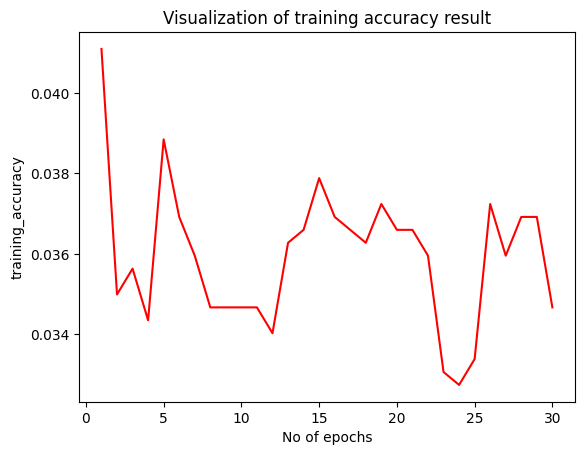

In [19]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='r')
plt.xlabel('No of epochs')
plt.ylabel('training_accuracy')
plt.title("Visualization of training accuracy result")
plt.show()

###Validation Accuracy

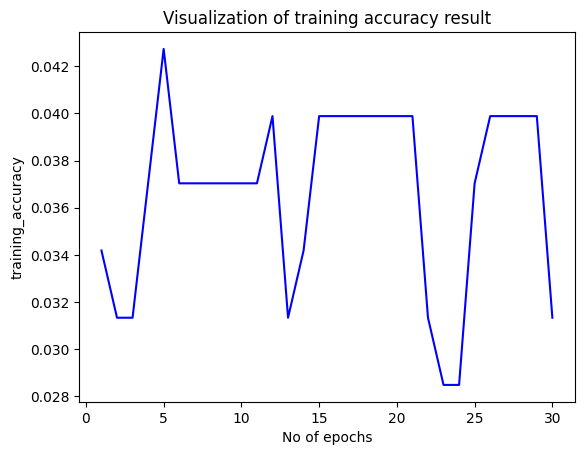

In [20]:
plt.plot(epochs,training_history.history['val_accuracy'],color='b')
plt.xlabel('No of epochs')
plt.ylabel('training_accuracy')
plt.title("Visualization of training accuracy result")
plt.show()

##Loading Model

In [21]:
cnn = tf.keras.models.load_model("/content/trained_model.h5")

##Visualization and performing prediction on single image

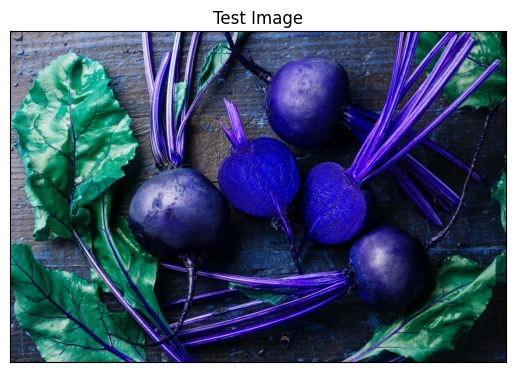

In [22]:
import cv2
image_path = '/content/drive/MyDrive/food recognition/test/beetroot/Image_1.jpg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

###testing Model

In [23]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #converting single image in to batch
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 106ms/step


In [24]:
print(predictions[0])

[0.0000000e+00 2.6863915e-27 1.9457730e-18 0.0000000e+00 4.2915490e-34
 1.8768503e-26 4.1680433e-33 5.5402248e-32 0.0000000e+00 6.0280780e-31
 1.0000000e+00 8.5676371e-21 7.8700190e-38 6.6410640e-23 6.2366554e-23
 8.8264122e-17 1.7350780e-22 2.0568143e-20 9.9433725e-21 8.0194046e-21
 3.8132686e-28 4.6380480e-16 6.7277268e-25 3.4512903e-27 1.4814139e-09
 6.8933502e-15 8.6007256e-25 1.2156695e-27 1.6255875e-32 7.7551618e-38
 1.7700077e-30 9.8501656e-20 0.0000000e+00 0.0000000e+00 3.6718918e-26
 8.1538598e-38]


In [25]:
print(max(predictions[0]))

1.0


In [27]:
test_set = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/food recognition/test",
                                                           labels="inferred",label_mode = "categorical",class_names=None,color_mode='rgb',
                                                           batch_size=32,image_size=(64,64),shuffle = True,seed=None,validation_split=None,subset=None,interpolation='bilinear',follow_links=False,
                                                           crop_to_aspect_ratio=False)

Found 359 files belonging to 36 classes.


In [28]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [29]:
result_index = np.where(predictions[0]==max(predictions[0]))
print(result_index)

(array([10]),)


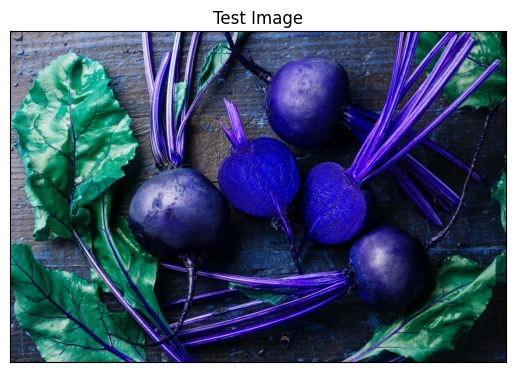

In [30]:
#display image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [31]:
#single prediction
print("it is a {}".format(test_set.class_names[result_index[0][0]]))

it is a cucumber
